In [58]:
# import zone
from vision_models_playground.utility.datasets import get_voc_detection_dataset
from pprint import pprint
import cv2
import numpy as np
import PIL
from matplotlib import pyplot as plt

In [4]:
# Get the dataset
voc_train, voc_test = get_voc_detection_dataset(root='./../data')

100%|██████████| 1999639040/1999639040 [00:57<00:00, 34594984.81it/s]


Extracting ./../data/VOCtrainval_11-May-2012.tar to ./../data
Using downloaded and verified file: ./../data/VOCtrainval_11-May-2012.tar
Extracting ./../data/VOCtrainval_11-May-2012.tar to ./../data


# Explore particular information

In [41]:
# Grab a sample
image, target = next(iter(voc_train))

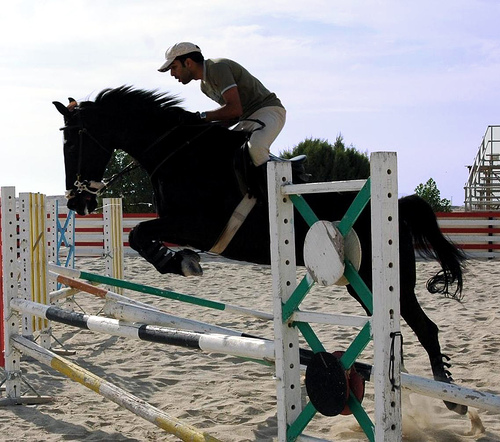

In [42]:
image

In [43]:
pprint(target)

{'annotation': {'filename': '2008_000008.jpg',
                'folder': 'VOC2012',
                'object': [{'bndbox': {'xmax': '471',
                                       'xmin': '53',
                                       'ymax': '420',
                                       'ymin': '87'},
                            'difficult': '0',
                            'name': 'horse',
                            'occluded': '1',
                            'pose': 'Left',
                            'truncated': '0'},
                           {'bndbox': {'xmax': '289',
                                       'xmin': '158',
                                       'ymax': '167',
                                       'ymin': '44'},
                            'difficult': '0',
                            'name': 'person',
                            'occluded': '0',
                            'pose': 'Unspecified',
                            'truncated': '1'}],
                'segme

In [44]:
# get the object information from the target
objects = target['annotation']['object']

for obj in objects:
    print(obj['name'])
    print(obj['bndbox'])

horse
{'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'}
person
{'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'}


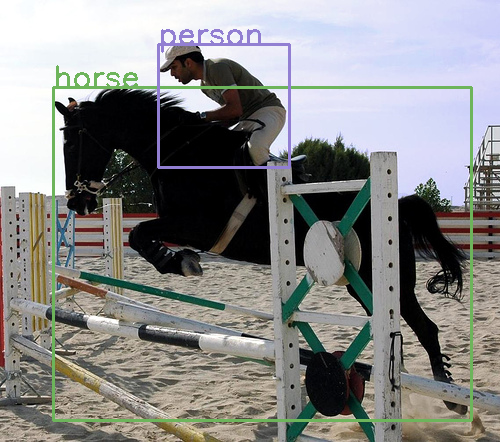

In [47]:
# Draw a bounding box for each object using OpenCV
image_edited = np.array(image)
for obj in objects:
    # assign a random color
    color = np.random.randint(0, 255, 3).tolist()

    x_min = int(obj['bndbox']['xmin'])
    y_min = int(obj['bndbox']['ymin'])
    x_max = int(obj['bndbox']['xmax'])
    y_max = int(obj['bndbox']['ymax'])
    name = obj['name']
    cv2.rectangle(image_edited, (x_min, y_min), (x_max, y_max), color, 2)
    cv2.putText(image_edited, name, (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

# Convert it back to PIL image
image_edited = PIL.Image.fromarray(image_edited)
image_edited

In [46]:
# Get the image size
image.size

(500, 442)

# Explore general information

In [50]:
# See len of the datasets
print(len(voc_train), len(voc_test))

5717 5823


In [51]:
# See all the object names in train
train_obj_names = set()
for image, target in voc_train:
    objects = target['annotation']['object']
    for obj in objects:
        train_obj_names.add(obj['name'])

print(list(train_obj_names), len(train_obj_names))

['sheep', 'bottle', 'dog', 'chair', 'aeroplane', 'tvmonitor', 'pottedplant', 'diningtable', 'bird', 'bus', 'cow', 'horse', 'boat', 'cat', 'sofa', 'person', 'train', 'car', 'bicycle', 'motorbike'] 20


In [52]:
# See all the object names in test
test_obj_names = set()
for image, target in voc_test:
    objects = target['annotation']['object']
    for obj in objects:
        test_obj_names.add(obj['name'])

print(list(test_obj_names), len(test_obj_names))

['sheep', 'dog', 'bottle', 'chair', 'aeroplane', 'tvmonitor', 'pottedplant', 'diningtable', 'bird', 'bus', 'cow', 'horse', 'boat', 'cat', 'sofa', 'person', 'train', 'car', 'bicycle', 'motorbike'] 20


In [56]:
# Check the overlap between train and test
len(train_obj_names.intersection(test_obj_names)) == len(train_obj_names)

True

In [60]:
# grab the image sizes
sizes = []
for image, target in voc_train:
    sizes.append(image.size)

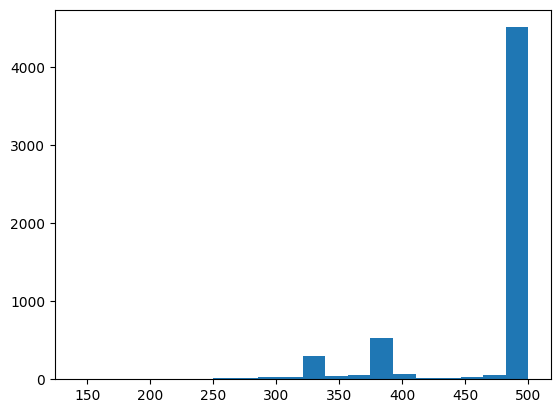

In [61]:
# create a histogram for x
x = [size[0] for size in sizes]
plt.hist(x, bins=20)
plt.show()

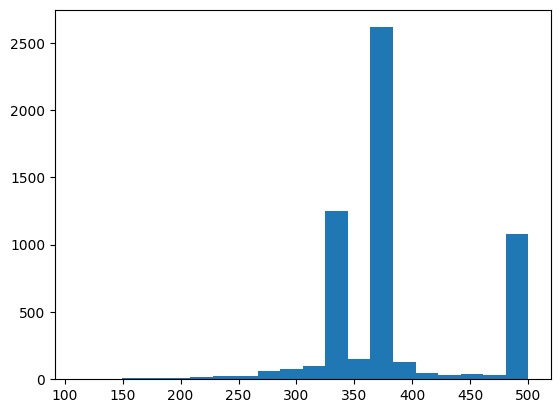

In [62]:
y = [size[1] for size in sizes]
plt.hist(y, bins=20)
plt.show()

In [64]:
# Show the min and max of the sizes
print(min(x), max(x))
print(min(y), max(y))

142 500
111 500
